In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [2]:
filename = 'sales_data.csv'
df = pd.read_csv(filename, index_col=0)
df.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)


In [3]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.9


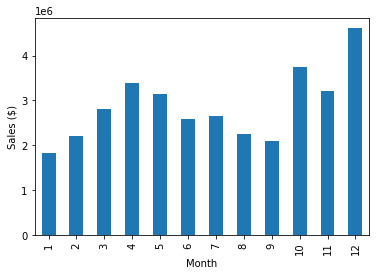

In [4]:
ax = df.groupby(['Month']).sum()['Sales'].plot(kind='bar')
plt.ylabel('Sales ($)')
plt.xlabel('Month')
plt.show()

In [5]:
wid_city = widgets.Dropdown(name='City')

In [6]:
df.City.unique()

array(['Dallas  (TX)', 'Boston  (MA)', 'Los Angeles  (CA)',
       'San Francisco  (CA)', 'Seattle  (WA)', 'Atlanta  (GA)',
       'New York City  (NY)', 'Portland  (OR)', 'Austin  (TX)',
       'Portland  (ME)'], dtype=object)

In [7]:
wid_city.options = list(df.City.unique())

In [9]:
wid_city

Dropdown(index=9, options=('Dallas  (TX)', 'Boston  (MA)', 'Los Angeles  (CA)', 'San Francisco  (CA)', 'Seattl…

In [19]:
wid_city.value

'Austin  (TX)'

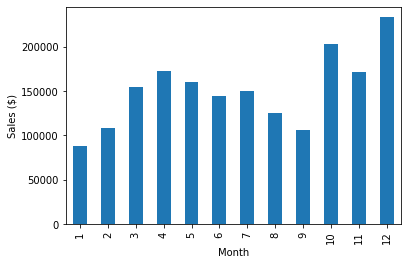

In [20]:
df_tmp = df[df['City'] == wid_city.value]

ax = df_tmp.groupby(['Month']).sum()['Sales'].plot(kind='bar')
plt.ylabel('Sales ($)')
plt.xlabel('Month')
plt.show()

In [23]:
wid_city = widgets.Dropdown(name='City')
wid_city.options = list(df.City.unique())

wid_product = widgets.Dropdown(name='product')
wid_product.options = list(df.Product.unique())

def func(city, product):
    df_tmp = df[df['City'] == wid_city.value].copy()
    df_tmp = df_tmp[df_tmp['Product'] == wid_product.value]
    
    ax = df_tmp.groupby(['Month']).sum()['Sales'].plot(kind='bar')
    plt.ylabel('Sales ($)')
    plt.xlabel('Month')
    plt.show()
    
interactive_plot = widgets.interactive(func, city=wid_city, product=wid_product)    

output = interactive_plot.children[-1]
output.layout.height = '350px'

interactive_plot

interactive(children=(Dropdown(description='city', options=('Dallas  (TX)', 'Boston  (MA)', 'Los Angeles  (CA)…